In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [61]:
G = nx.read_adjlist('enron_profanity_scores.graph', create_using = nx.DiGraph)
outDegrees = sorted(G.out_degree(), key = lambda x: -x[1])
inDegrees = sorted(G.in_degree(), key = lambda x: -x[1])
top = 10

DiGraph with 446 nodes and 454 edges


In [54]:
def unzipNodeDegrees(nodes):
    x = []
    y = []
    for node, degree in nodes:
        x.append(node)
        y.append(degree)
    return x, y

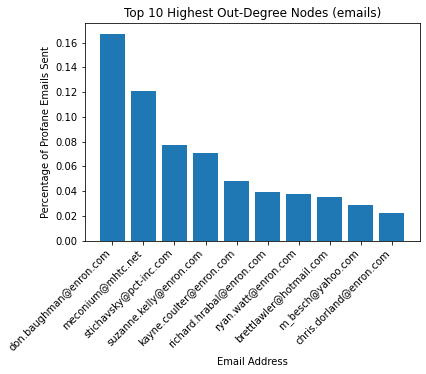

In [100]:
totalOutEdges = len(G.out_edges())
plt.figure(1)
x, y = unzipNodeDegrees(outDegrees[:top])
y = [d / float(totalOutEdges) for d in y]
plt.title(f'Top {top} Highest Out-Degree Nodes (emails)')
plt.xlabel('Email Address')
plt.ylabel('Percentage of Profane Emails Sent')
plt.xticks(rotation=45, ha='right')
plt.bar(x, y)
plt.show()

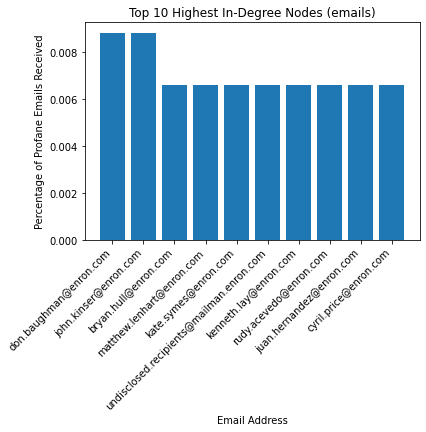

In [101]:
totalInEdges = len(G.in_edges())
plt.figure(2)
x, y = unzipNodeDegrees(inDegrees[:top])
y = [d / float(totalInEdges) for d in y]
plt.title(f'Top {top} Highest In-Degree Nodes (emails)')
plt.xlabel('Email Address')
plt.ylabel('Percentage of Profane Emails Received')
plt.xticks(rotation=45, ha='right')
plt.bar(x, y)
plt.show()

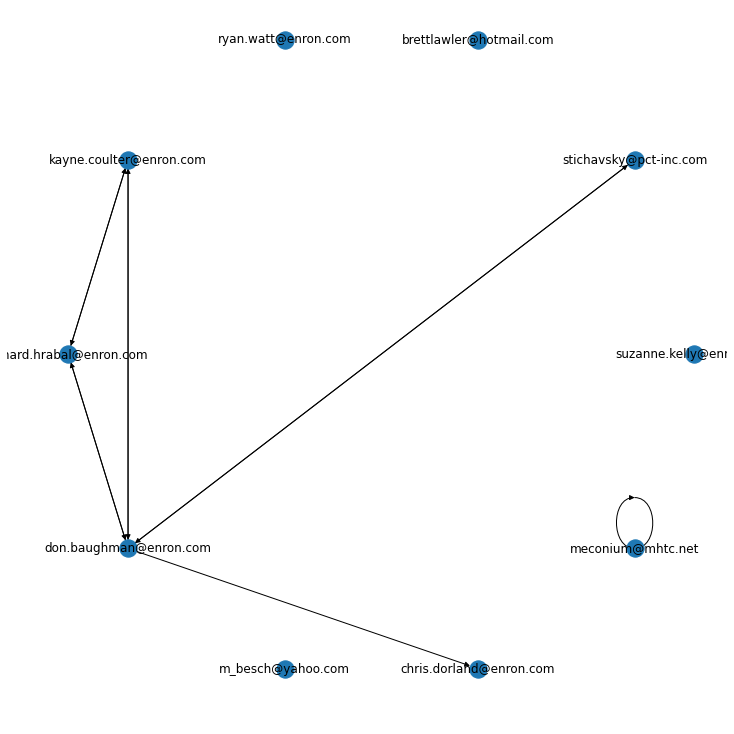

In [134]:
plt.figure(3, figsize=(10,10))
Gu = G.subgraph(outHubs)
pos = nx.circular_layout(Gu)
nx.draw(Gu, pos, with_labels = True)

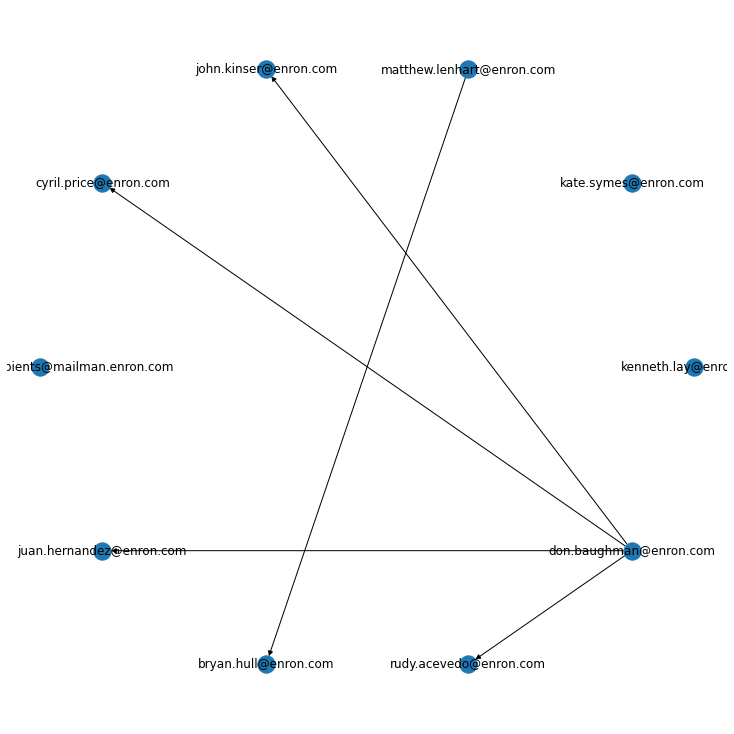

In [135]:
plt.figure(4, figsize=(10,10))
Gu = G.subgraph(inHubs)
pos = nx.circular_layout(Gu)
nx.draw(Gu, pos, with_labels = True)